In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image

In [3]:
logo = Image.open("/home/arno/kmcuda/img/h2o-logo.jpg")

In [4]:
data = array(logo)

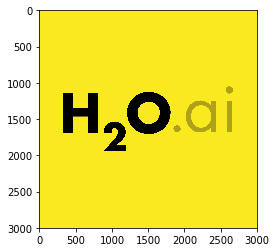

In [5]:
imshow(data)

In [6]:
data.shape

(3000, 3000, 3)

In [7]:
N = 2000000
seed(777)
space = concatenate((randint(0, data.shape[0], N)[:, newaxis], randint(0, data.shape[1], N)[:, newaxis]), axis=1)

In [8]:
uspace = zeros_like(data)
uspace[space[:, 0], space[:, 1]] = 1

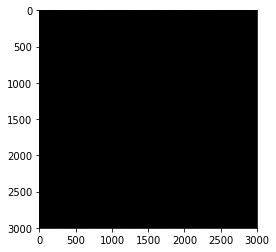

In [9]:
imshow(uspace)

In [10]:
dots = data * uspace

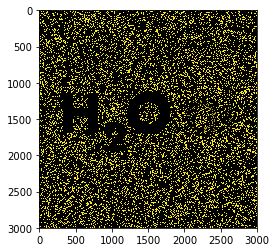

In [11]:
imshow(dots)

In [12]:
dataset = vstack(nonzero(dots)).T

In [13]:
dataset

array([[   0,    2,    0],
       [   0,    2,    1],
       [   0,    2,    2],
       ..., 
       [2999, 2994,    0],
       [2999, 2994,    1],
       [2999, 2994,    2]])

In [14]:
dataset = dataset.astype(float32)

In [15]:
dataset.shape

(5123639, 3)

In [16]:
import libKMCUDA

In [17]:
%time cents, asses = libKMCUDA.kmeans_cuda(dataset, 100, seed=777)

CPU times: user 14.3 s, sys: 3.55 s, total: 17.9 s
Wall time: 17.9 s


In [18]:
12 * dots.shape[0] / dots.shape[1]

12.0

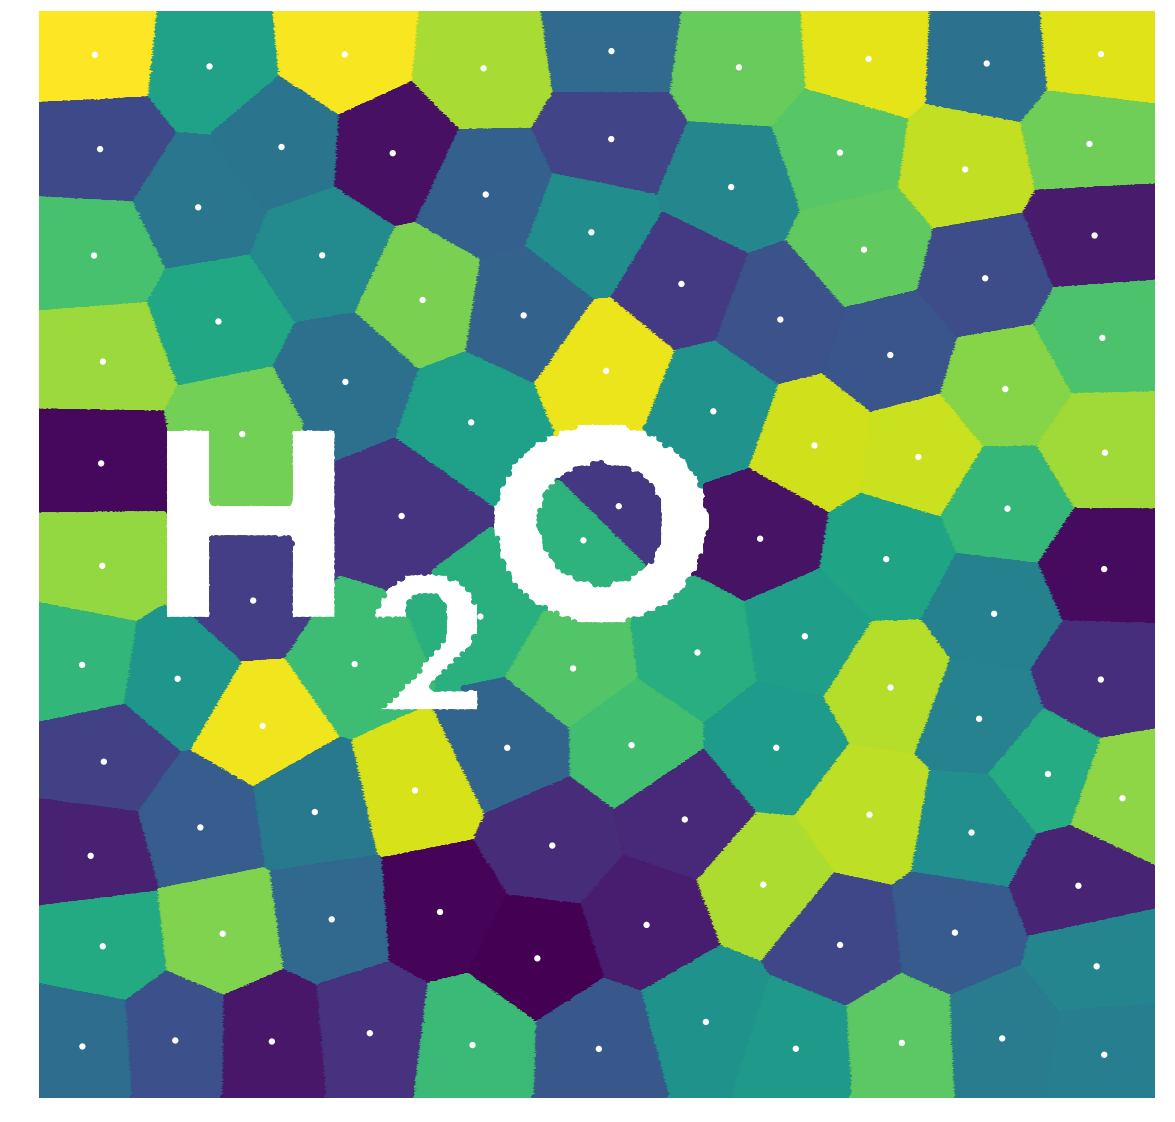

In [19]:
rcParams["figure.figsize"] = (20, 20)
scatter(dataset[:, 1], dots.shape[0] - dataset[:, 0], c=asses, edgecolors="none")
scatter(cents[:, 1], dots.shape[0] - cents[:, 0], c="white", s=40, edgecolors="none")
xlim((0, dots.shape[1]))
ylim((0, dots.shape[0]))
axis("off")
savefig("sourced.png", transparent=True, bbox_inches=0, pad_inches=0)